# Hypothesis Testing

###### Hypothesis testing is the process used to evaluate the strength of evidence from the sample and provides a framework for making determinations related to the population, ie, it provides a method for understanding how reliably one can extrapolate observed findings in a sample under study to the larger population from which the sample was drawn

###### 4 Steps of Hypothesis Testing
All hypotheses are tested using a four-step process:

1. The first step is for the analyst to state the two hypotheses so that only one can be right.
2. The next step is to formulate an analysis plan, which outlines how the data will be evaluated.
3. The third step is to carry out the plan and physically analyze the sample data.
4. The fourth and final step is to analyze the results and either reject the null hypothesis, or state that the null hypothesis is plausible, given the data.

# Understanding the Hypothesis Testing

###### Step - 1:

Alternate Hypothesis (Bold claim): $$ H_1 \ \Rightarrow \ \gt, \ \lt, \ \neq  $$

Null Hypothesis (Status Quo): $$ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $$

###### Step - 2:

Collect a sample of size n
Compute the mean from this sample $$ \bar{x} $$

###### Step - 3: Compute Test Statistic:

If population variance is known$$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

If population variance is unknown$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

###### Step - 4: Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

###### Step - 5.1: Apply decision rule:

If test statistic is z-score -

Two tailed z-test:$$ |z| \gt z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
Right tailed z-test:$$ z \gt z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Left tailed z-test:$$ z \lt -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
If test statistic is t-score

Two tailed t-test:$$ |t| \gt t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Right tailed t-test:$$ t \gt t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
Left tailed t-test:$$ t \lt t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

###### Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $

For two tailed test:$$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$Now,$$ if (p \ value \lt \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

### As we have already learnt about how to perform hypothesis testing with z-score(in case of known Variance of Population), Now lets learn to perform hypothesis testing with t-score(i.e, in case where Variance of Population values are unknown)

In [39]:
#importing Python Libraries

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t,norm

In [40]:
# t-score for normal distribution
def t_score(sample_size,sample_mean,pop_mean,sample_std):
    numerator = sample_mean - pop_mean
    denominator = sample_std / sample_size**0.5
    return numerator/denominator


###### Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? 

Step - 1:
Alternate Hypothesis (Bold claim):$$ H_1:Each\ packet\ does\ not\ contain\ 500\ grams  $$Null Hypothesis (Status Quo):$$ H_0: Each\ packet\ contain\ 500\ grams $$

Step - 2:

Collect a sample of size n = 10$$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
Compute sample mean$$ \bar{x} \ = \ ? $$
Step - 3: Compute Test Statistic(as population std is not given):$$ t = \frac{\bar{x}-\mu_{\bar{x}}}{\frac{\ S}{\sqrt{n}}} $$

Step - 4: Decide $ \alpha $ or significance level

Step - 5.1: Calculate tailed t-test:$$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [41]:
#Calculating Sample mean, sample standard deviation
sam = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
sam_mean = np.mean(sam)
sam_std = np.std(sam)
pop_mean = 500
sam_size = 10
print(sam_mean)
print(sam_std)

465.3
82.3918078451978


In [42]:
#Calculating t_score
T_score = t_score(sam_size,sam_mean,pop_mean,sam_std)
print(T_score)

-1.3318197242863192


In [43]:
#Calculating t_critical value
confidence_level = 0.95
df = 9
alpha = 1 - confidence_level
t_critical = t.ppf(1-alpha/2,df)
print(t_critical)

2.2621571627409915


Text(465.3, 0.0007, 'x_bar')

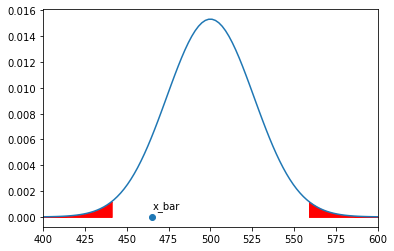

In [44]:
#plotting the sample distribution with rejection region
x_min = 400
x_max = 600

#defining sample mean and sample std
mean = pop_mean
std = sam_std/ sam_size**0.5

#plotting the graph and setting limits
x = np.linspace(x_min,x_max,100)
y = norm.pdf(x, mean ,std)
plt.xlim(x_min,x_max)
plt.plot(x,y)

#Computing the left and right critical values
t_critical_left = pop_mean + (-t_critical*std)
t_critical_right = pop_mean + (t_critical*std)

#Shading the left rejection region
x1 = np.linspace(x_min,t_critical_left,100)
y1 = norm.pdf(x1,mean,std)
plt.fill_between(x1,y1,color='red')

#Shading the right rejection region
x2 = np.linspace(t_critical_right,x_max,100)
y2 = norm.pdf(x2,mean,std)
plt.fill_between(x2,y2,color='red')

#plotting the sample mean
plt.scatter(sam_mean,0)
plt.annotate('x_bar',(sam_mean,0.0007))

In [45]:
#conclusion using t-test
if(np.abs(T_score)>t_critical):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Failed to reject null hypothesis


In [46]:
#Conclusion using p-test:
p_value = 2 * (1.0 - norm.cdf(np.abs(T_score)))
print("P_value:",p_value)
if (p_value<alpha):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

P_value: 0.18291943486353945
Failed to reject null hypothesis


###### Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

Step - 1:
Alternate Hypothesis (Bold Claim):$$ \ {H_1} = All\ users\ rating\ are\ above\ 4  $$Null Hypothesis (Status Quo):$$ \ {H_0} = Users\ ratings\ are\ not\ above\ 4  $$

Step - 2:

Collect a sample of size n = 20$$ [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5] $$
Compute sample mean$$ \bar{x} \ = \ ? $$
Step - 3: Compute Test Statistic:$$  t = \frac{\bar{x}-\mu_{\bar{x}}}{\frac{\ S}{\sqrt{n}}}  $$

Step - 4: Decide $ \alpha $

Step - 5.1: Compute tailed t-test:$$ reject \ H_0 \ if ? $$

Step - 5.2: Compute p-value

In [47]:
#Calculating sample mean,sample standard deviation
sam = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5] 
sam_mean = np.mean(sam)
sam_std = np.std(sam)
pop_mean = 4
sam_size = 20
print(sam_mean)
print(sam_std)

4.25
0.82915619758885


In [48]:
#Calculating t-score
T_score = t_score(sam_size,sam_mean,pop_mean,sam_std)
print(T_score)

1.3483997249264843


In [49]:
#Calculating t-critical
confidence_level = 0.95
df = 19
alpha = 1 - confidence_level
t_critical = t.ppf(1-alpha,df)
print(t_critical)

1.729132811521367


Text(4.25, 0.01, 'x_bar')

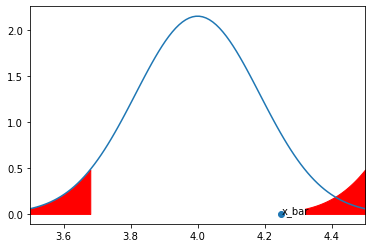

In [50]:
#plotting the sampling distribution with rejection region
x_min = 3.5
x_max = 4.5

#defining the sample mean and sample standard deviation
mean = pop_mean
std = sam_std/ (sam_size**0.5)

#plotting the graph and setting x_limit
x = np.linspace(x_min,x_max,100)
y = norm.pdf(x,mean,std)
plt.xlim(x_min,x_max)
plt.plot(x,y)

#Computing critical t value
t_critical_left = pop_mean + (-t_critical*std)
t_critical_right = pop_mean + (t_critical * std)

#Shading the left rejection region
x1 = np.linspace(x_min,t_critical_left,100)
y1 = norm.pdf(x1,mean,std)
plt.fill_between(x1,y1,color='red')

#shading the right rejection area
x2 = np.linspace(t_critical_right,x_max,100)
y2 = norm.pdf(x1,mean,std)
plt.fill_between(x2,y2,color="red")

#plotting the sample_mean and concluding the results
plt.scatter(sam_mean,0)
plt.annotate("x_bar",(sam_mean,0.01))

In [51]:
#Conclusion using t-test
if (t_critical<T_score):
    print("Reject null hypothesis")
else: 
    print("Failed to reject null hypothesis")

Failed to reject null hypothesis


In [52]:
#Conclusion using p-test
p_value = 1.0 - norm.cdf(np.abs(T_score))
print("P_value :",p_value)
if(p_value<alpha):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

P_value : 0.08876492620607679
Failed to reject null hypothesis


###### Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? 

Step - 1:
Alternate Hypothesis (Bold Claim):$$ \ {H_1} = Average\ mileage\ is\ atleast\ 15km/litre $$Null Hypothesis (Status Quo):$$\ {H_0} = Average\ mileage\ is\ not\ 15kmpl $$

Step - 2:

Collect a sample of size n = 20$$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
Compute sample mean$$ \bar{x} \ = \ ? $$
Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x}-\mu_{\bar{x}}}{\frac{\ S}{\sqrt{n}}} $$

Step - 4: Decide $ \alpha $

Step - 5.1: Compute tailed t-test:$$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [53]:
# calculate sample mean and sample standard deviation
sam = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
sam_mean = np.mean(sam)
sam_std = np.std(sam)
pop_mean = 15
sam_size = 20
print(sam_mean)
print(sam_std)

15.099
0.9994043225842081


In [54]:
#calculate t-score
T_score = t_score(sam_size,sam_mean,pop_mean,sam_std)
print(T_score)

0.4430053478257341


In [55]:
#Calculate t-critical
confidence_level = 0.95
alpha = 1 - confidence_level
df = 19
t_critical = t.ppf(1-alpha,df)
print(t_critical)

1.729132811521367


Text(15.099, 0.01, 'x_bar')

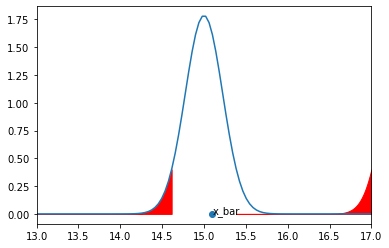

In [56]:
#plotting sampling distribution with rejection region
x_min = 13
x_max = 17

#defining the sample mean and sample std
mean = pop_mean
std = sam_std / (sam_size**0.5)

#plotting the graph and setting x limits
x = np.linspace(x_min, x_max,100)
y = norm.pdf(x,mean,std)
plt.xlim(x_min,x_max)
plt.plot(x,y)

#defining the t critical value
t_critical_left = pop_mean + (-t_critical*std)
t_critical_right = pop_mean + (t_critical * std)

#Shading the left rejection region
x1 = np.linspace(x_min,t_critical_left,100)
y1 = norm.pdf(x1,mean,std)
plt.fill_between(x1,y1,color='red')

#shading the rejection region
x2 = np.linspace(t_critical_right,x_max,100)
y2 = norm.pdf(x1,mean, std)
plt.fill_between(x2,y2,color='red')

#plotting sample mean and concluding results
plt.scatter(sam_mean,0)
plt.annotate("x_bar",(sam_mean,0.01))

In [57]:
#Conclusion using t-test
if(T_score>t_critical):
    print("Reject null hypothesis")
else: 
    print("Failed to reject null hypothesis")

Failed to reject null hypothesis


In [58]:
#Conclusion using p-test
p_value = 1.0 - norm.cdf(np.abs(T_score))
print("P_value",p_value)
if (p_value<alpha):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

P_value 0.3288809332844478
Failed to reject null hypothesis


###### Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

Step - 1:
Alternate Hypothesis (Bold Claim):$$\ {H_1} = Takes\ less\ than\ 100ms\ for\ prediction $$Null Hypothesis (Status Quo):$$\ {H_0} = Takes\ more\ than\ 100ms $$

Step - 2:

Collect a sample of size n = 20$$  [109,98,86,119,88,97,94,96,118,101,104,108,99,92,81,115,106,101,111,90] $$

Compute sample mean$$ \bar{x} \ = \ ? $$
Step - 3: Compute Test Statistic:$$ t = \frac{\bar{x}-\mu_{\bar{x}}}{\frac{\ S}{\sqrt{n}}} $$

Step - 4: Decide $ \alpha $

Step - 5.1: Compute tailed t-test:$$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [59]:
#Calculating sample mean and sample standard deviation
sam = [109,98,86,119,88,97,94,96,118,101,104,108,99,92,81,115,106,101,111,90]
sam_mean = np.mean(sam)
sam_std = np.std(sam)
pop_mean = 100
sam_size = 20
print(sam_mean)
print(sam_std)

100.65
10.374367450596688


In [60]:
#calculating t-score
T_score = t_score(sam_size,sam_mean,pop_mean,sam_std)
print(T_score)

0.2801990949898888


In [61]:
#calculating t-critical
confidence_level = 0.99
alpha = 1 - confidence_level
df = 19
t_critical = t.ppf(1-alpha,df)
print(t_critical)

2.539483190622288


Text(100.65, 0.01, 'x_bar')

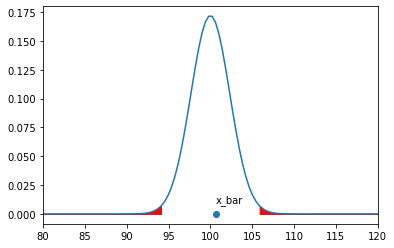

In [62]:
#plotting sample distribution with rejection region
x_min = 80
x_max = 120

#Calculating mean and standard deviation
mean = pop_mean
std = sam_std / (sam_size**0.5)

#plotting the graph and setting xlimits
x = np.linspace(x_min,x_max,100)
y = norm.pdf(x,mean,std)
plt.xlim(x_min,x_max)
plt.plot(x,y)

#defining t critical left value
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical*std)

#shading the rejection region
x1 = np.linspace(x_min,t_critical_left,100)
y1 = norm.pdf(x1,mean,std)
plt.fill_between(x1,y1,color='red')

#Shading the right rejection region
x2 = np.linspace(t_critical_right,x_max,100)
y2 = norm.pdf(x2,mean,std)
plt.fill_between(x2,y2,color='red')

#Plotting sample mean and conclusion
plt.scatter(sam_mean,0)
plt.annotate("x_bar",(sam_mean,0.01))

In [63]:
#conclusion using t_test
if (T_score<-t_critical):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Failed to reject null hypothesis


In [64]:
#Conclusion using p- test
p_value = 1.0 - norm.cdf(np.abs(T_score))
print("P_value:",p_value)
if (p_value<alpha):
    print("Reject null hypothesis")
else: 
    print("Failed to reject null hypothesis")

P_value: 0.38966238048260804
Failed to reject null hypothesis
